# Hotel Reservations Project

The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?

## Introduction

The Hotel Reservation Project is aimed at exploring and analyzing a dataset obtained from [Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) related to hotel reservations. The dataset contains valuable information about hotel bookings, including various features such as customer details, booking history, and reservation status. The main objective of this project is to predict whether a customer will honor the reservation or cancel it. This prediction can be valuable for hotels to manage their bookings more efficiently and reduce revenue loss due to cancellations.

## Data Description

- **no_of_adults**: The number of adults in the reservation (categorical: 5 values)
- **no_of_children**: The number of children in the reservation (categorical: 6 values)
- **no_of_weekend_nights**: The number of weekend nights included in the reservation (categorical: 8 values)
- **no_of_week_nights**: The number of weeknights included in the reservation (categorical: 18 values)
- **type_of_meal_plan**: The type of meal plan chosen (categorical: 4 values)
- **required_car_parking_space**: Whether a car parking space is required (binary: 2 values)
- **room_type_reserved**: The type of room reserved (categorical: 7 values)
- **lead_time**: The number of days between booking and arrival (numerical: range up to 352 days)
- **arrival_year**: The year of arrival (categorical: 2 values)
- **arrival_month**: The month of arrival (categorical: 12 values)
- **arrival_date**: The day of arrival (categorical: 31 values)
- **market_segment_type**: The type of market segment (categorical: 5 values)
- **repeated_guest**: Whether the guest is a repeated customer (binary: 2 values)
- **no_of_previous_cancellations**: The number of previous cancellations by the guest (categorical: 9 values)
- **no_of_previous_bookings_not_canceled**: The number of previous bookings not canceled by the guest (numerical: range up to 59)
- **avg_price_per_room**: The average price per room (numerical: range up to 3930)
- **no_of_special_requests**: The number of special requests made by the guest (categorical: 6 values)
- **booking_status**: The target variable, indicating whether the reservation was canceled or not (binary: 2 values)

This project will involve thorough data exploration, preprocessing, feature engineering, model building, evaluation, and drawing meaningful insights from the dataset to answer the key question of predicting booking status.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/My Work/DataSets/Hotel Reservations.csv")

In [3]:
# Taking a first look at the data set

df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [5]:
# Checking the different data types present 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.shape

(36275, 19)

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

there are no missing values in the dataset, in other words this is clean

## Exploratory Data Analysis

In this process, I will be analyzing the data to understand the trends and
patterns in the data. Through this analysis, I will be able to understand the data better
and build a better model for prediction

Basic Statistics:
- The dataset has 36,275 entries with various numerical and categorical features.

- Key statistics for numerical features:
    - lead_time: Ranges from 0 to 443 days, with an average of about 85 days.
    - avg_price_per_room: Ranges from $0 to $540, with an average of approximately $103.

C:\Users\nikau\AppData\Local\Temp/ipykernel_16360/2838176026.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


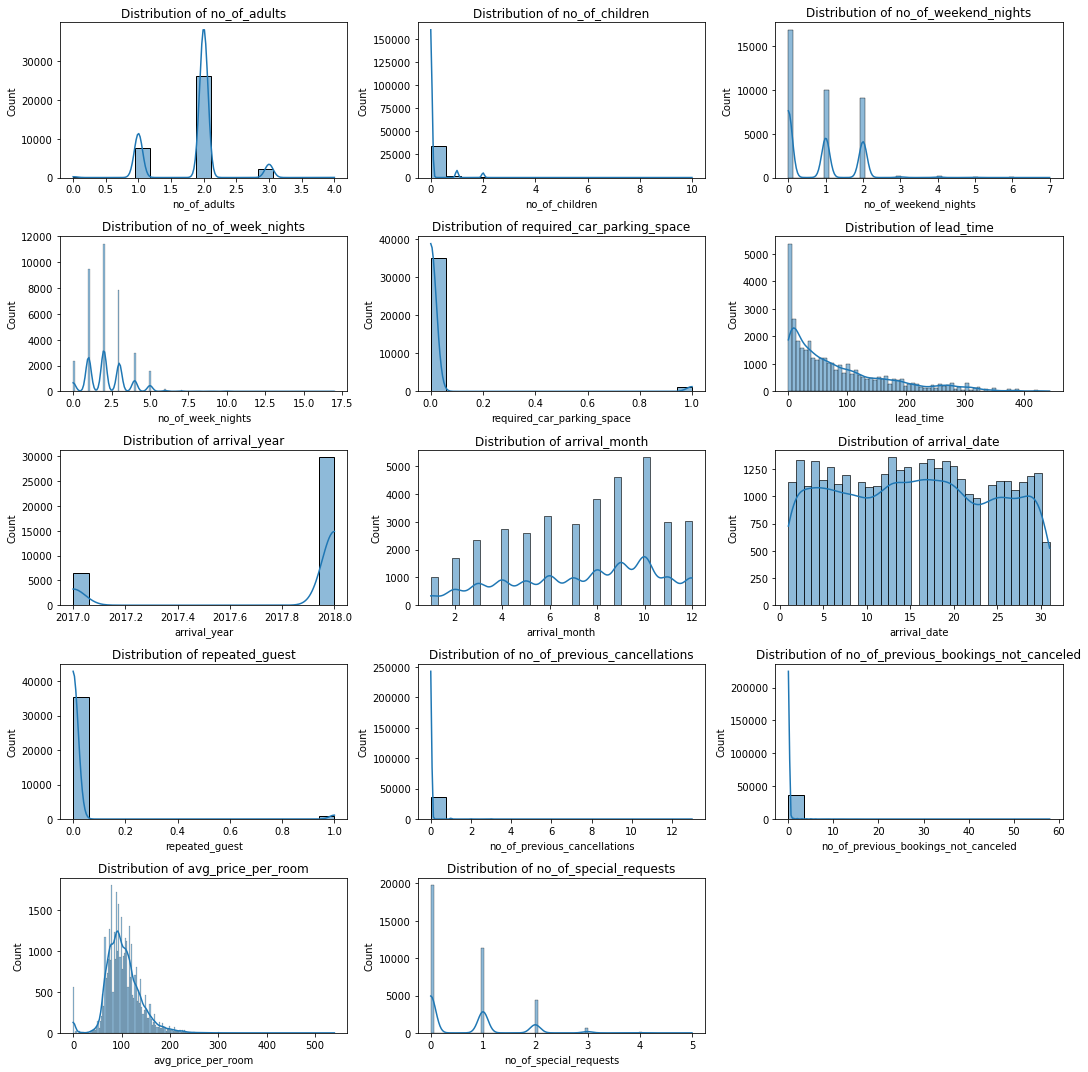

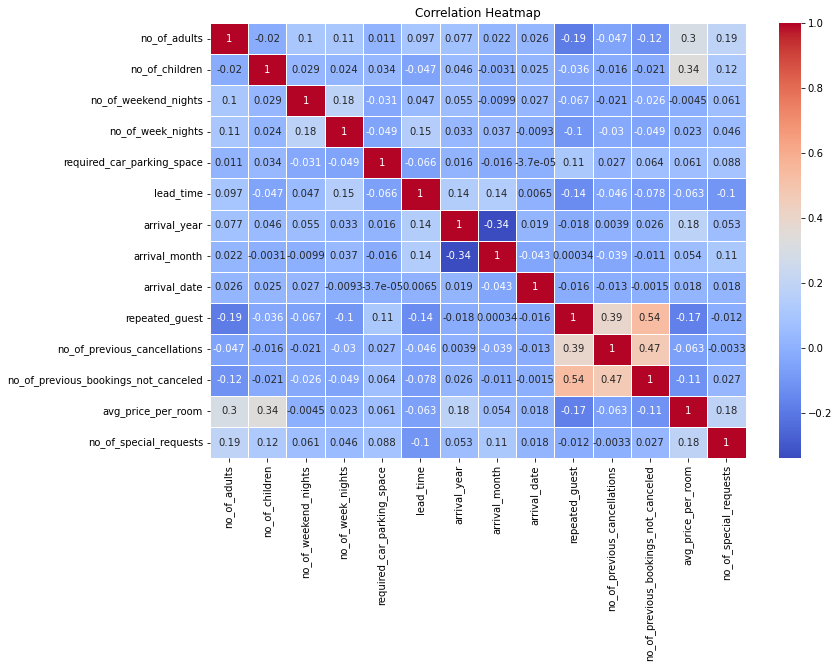

In [8]:
# Adjusting the plot size to fit the number of columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Show plots and stats
plt.show()

####  Visualizations:

Distributions:
- The distributions of key numerical features such as the number of adults, children, weekend nights, weeknights, lead time, and average price per room were plotted.

Correlation Heatmap:
- Correlations between numerical features. Key observations:
    - no_of_week_nights and lead_time have a moderate positive correlation (0.29).
    - lead_time and avg_price_per_room have a weak positive correlation (0.14).

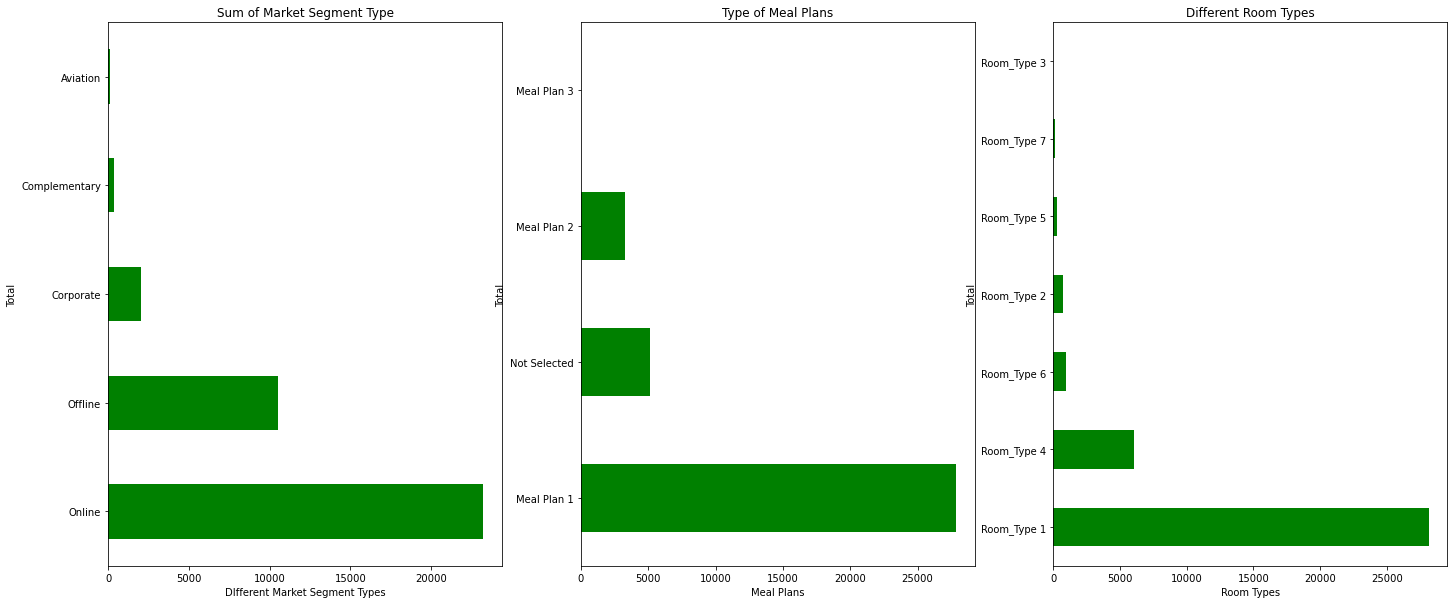

In [9]:
# Set the figure size and create subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 10))

# Create the first bar plot
df['market_segment_type'].value_counts().plot(kind='barh', ax=axs[0], color='green')
axs[0].set_title('Sum of Market Segment Type')
axs[0].set_xlabel('DIfferent Market Segment Types')
axs[0].set_ylabel('Total')

# Create the second bar plot
df['type_of_meal_plan'].value_counts().plot(kind='barh', ax=axs[1], color='green')
axs[1].set_title('Type of Meal Plans')
axs[1].set_xlabel('Meal Plans')
axs[1].set_ylabel('Total')

# Create the third bar plot
df['room_type_reserved'].value_counts().plot(kind ='barh', ax=axs[2], color='green')
axs[2].set_title('Different Room Types')
axs[2].set_xlabel('Room Types')
axs[2].set_ylabel('Total')

# Adjust the layout the prevent overlap
plt.tight_layout

# show the plot
plt.show()

### Market Segment Type:

The most popular market is online customers. This is commonly used by tourists who are travelling about and in need of quick and easy accomodation. Offline and Corporate are second and third highest on the graph as people who travel for work are also constanly looking for a hotel close by to wherever their work is.

#### Importance of Market Segmentation

Targeted Marketing: Enables hotels to create specific marketing campaigns tailored to the needs and preferences of different segments, leading to higher engagement and conversion rates.

Service Customization: Helps in designing and offering services that cater specifically to the needs of each segment, improving guest satisfaction.

Revenue Management: Allows for better revenue management strategies by understanding the booking patterns and pricing sensitivities of different segments.

Improved Occupancy Rates: By targeting diverse segments, hotels can fill rooms throughout the year, balancing peak and off-peak seasons.

#### Example Application

For instance, a hotel might:

- Offer special corporate rates and business packages for business travelers.
- Create family vacation packages with activities for children.
- Provide wedding packages for group travelers attending ceremonies.
- Design long-term stay discounts for extended stay guests.
- Understanding and effectively targeting these market segments can significantly enhance a hotel's ability to attract and retain guests, thereby driving overall business success.



### Types of Meal Plans

Meal Plan 1 is the favourite meal amongst customers, some customers  didn't order food at all and in last place is Meal Plan 3 wiht zero votes.

A hotel meal plan can be very important in retaining customers. Meal plans are often a significant factor in a guest's overall experience and satisfaction with their stay. Here are several reasons why offering a well-designed meal plan can contribute to customer retention:

#### Convenience and Comfort
- Ease of Planning: Meal plans provide guests with the convenience of not having to worry about finding meals outside the hotel, especially in unfamiliar areas.

- Comfort: Knowing that their meals are taken care of can make guests feel more comfortable and taken care of, enhancing their overall experience.

#### Quality and Variety
- Food Quality: High-quality meals can significantly enhance a guest’s experience. If the hotel's food offerings are exceptional, guests are more likely to return.

- Variety: Offering a variety of meal plans (e.g., breakfast only, half-board, full-board, all-inclusive) can cater to different guest preferences and dietary needs.

#### Example Implementation
- Breakfast Included: Many hotels offer complimentary breakfast, which is highly appreciated by guests and can be a deciding factor when booking.

- All-Inclusive: Resorts and vacation hotels often provide all-inclusive packages, covering all meals and drinks, making it easier for guests to enjoy their stay without additional worries about food costs.

- Dining Credits: Some hotels offer dining credits that guests can use at the hotel’s restaurants, providing flexibility and a sense of added value.

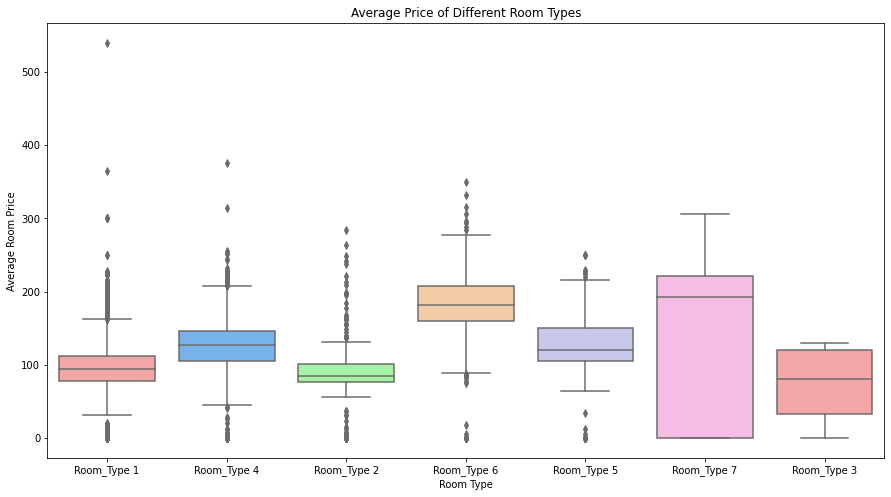

In [11]:
# Boxplot showing the average room price across all the different room types

plt.figure(figsize=(15,8))

custom_palette = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
sns.boxplot(data = df, x = 'room_type_reserved', y = 'avg_price_per_room', palette = custom_palette)

plt.title('Average Price of Different Room Types')
plt.xlabel('Room Type')
plt.ylabel('Average Room Price')
plt.show()

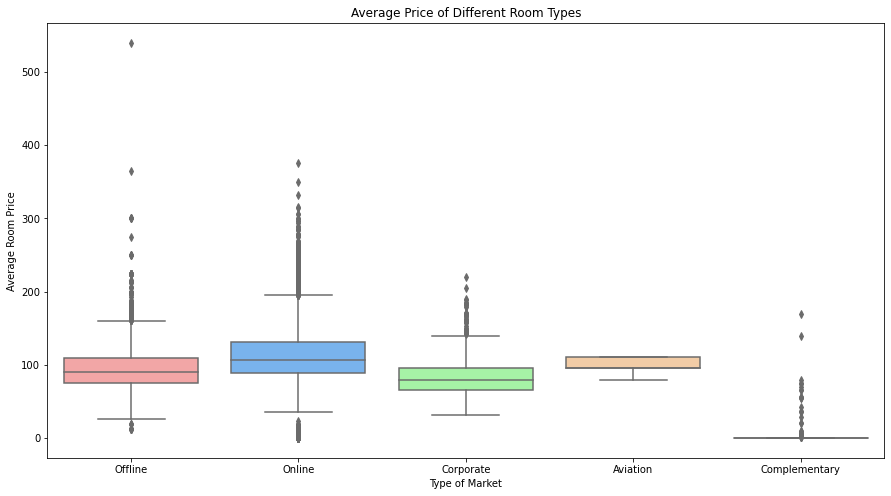

In [12]:
# Boxplot showing the average room price across all the different market types

plt.figure(figsize=(15,8))

custom_palette = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"]
sns.boxplot(data = df, x = 'market_segment_type', y = 'avg_price_per_room', palette = custom_palette)

plt.title('Average Price of Different Room Types')
plt.xlabel('Type of Market')
plt.ylabel('Average Room Price')
plt.show()

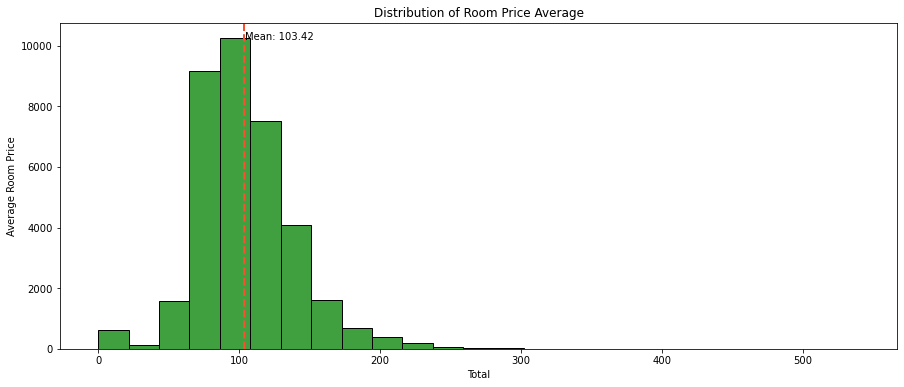

In [13]:
# Distribution of room price average

plt.figure(figsize=(15,6))

sns.histplot(data=df, x='avg_price_per_room', bins = 25, color='green')

median = df['avg_price_per_room'].mean()
color = '#fc4f30'

plt.axvline(median, color = color, linestyle='--', linewidth=2, label=f'Mean: {median:.2f}')
plt.text(median + 1, plt.gca().get_ylim()[1] * 0.95, f'Mean: {median:.2f}', ha='left')
plt.title('Distribution of Room Price Average')
plt.xlabel('Total')
plt.ylabel('Average Room Price')
plt.show()

C:\Users\nikau\AppData\Local\Temp/ipykernel_16360/2796033748.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['booking_status_numeric'].sort_values(ascending=False)


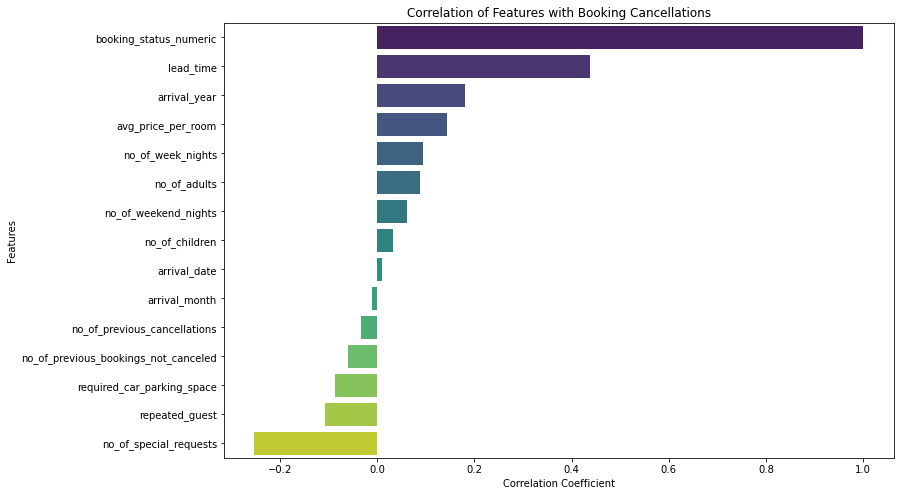

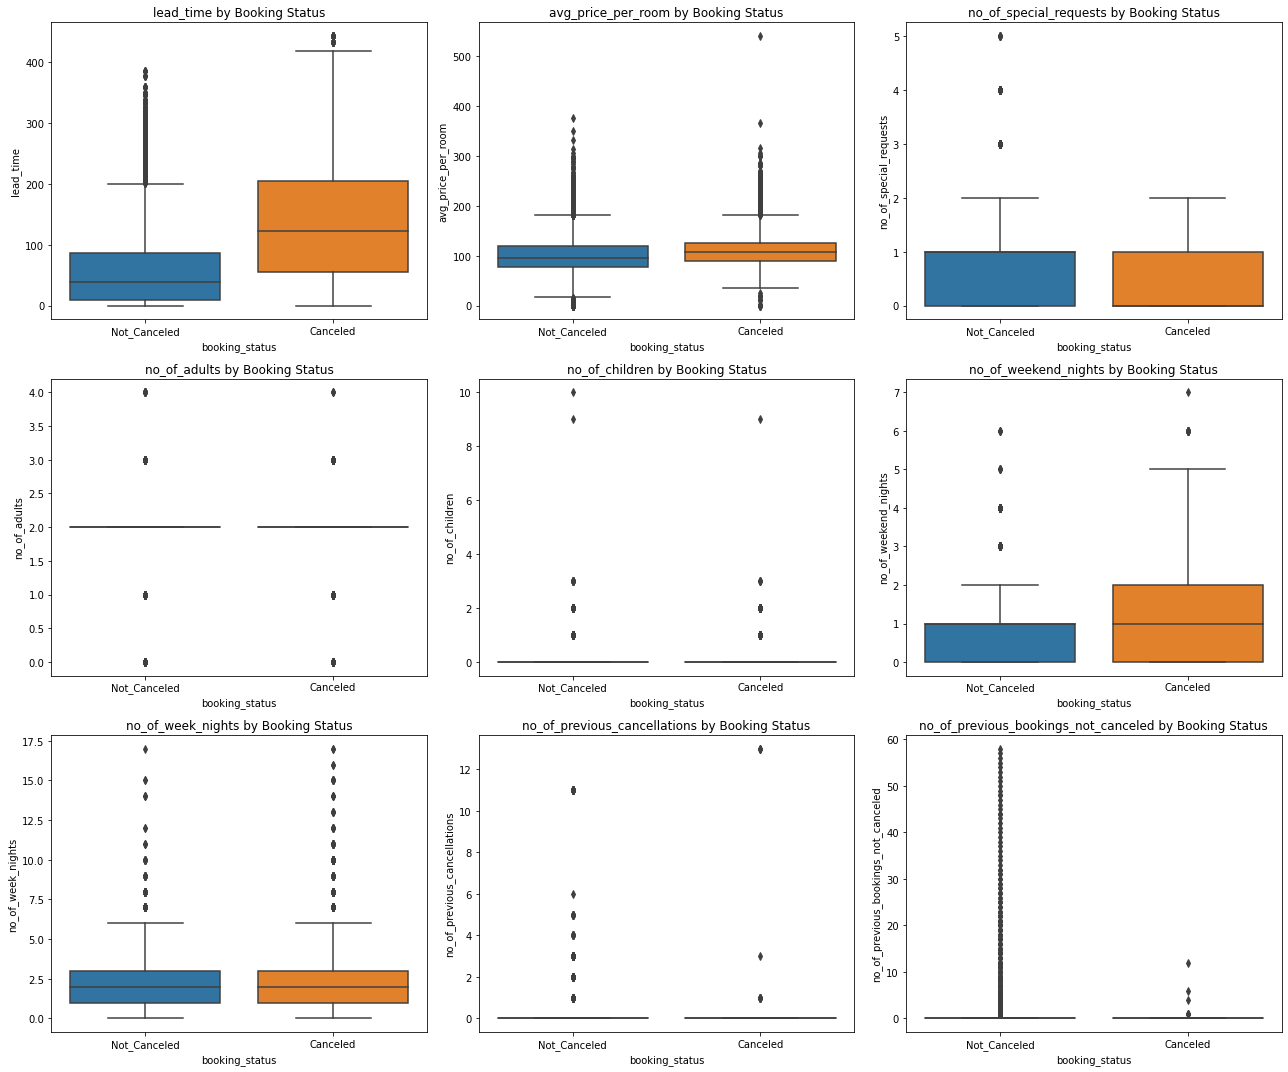

In [14]:
# Analyze factors affecting booking cancellations

# Convert booking_status to numerical values for easier analysis
df['booking_status_numeric'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Plotting correlations of features with booking cancellations
plt.figure(figsize=(12, 8))
correlations = df.corr()['booking_status_numeric'].sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Features with Booking Cancellations')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Analyze the distribution of key features between canceled and not canceled bookings
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
features_to_analyze = ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 
                       'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 
                       'no_of_week_nights', 'no_of_previous_cancellations', 
                       'no_of_previous_bookings_not_canceled']

for i, feature in enumerate(features_to_analyze):
    sns.boxplot(x='booking_status', y=feature, data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{feature} by Booking Status')

plt.tight_layout()
plt.show()


### Analysis of Factors Affecting Booking Cancellations

Correlation Analysis
- The bar plot shows the correlation coefficients of various features with booking cancellations:
    - Lead Time: The strongest positive correlation with cancellations (~0.29).
    - No. of Previous Cancellations: Also positively correlated (~0.11).
    - Avg. Price Per Room: Weak positive correlation (~0.06).
    - No. of Special Requests: Weak negative correlation (~-0.19).
    - No. of Previous Bookings Not Canceled: Negative correlation (~-0.12)
    
    
Boxplot Analysis
- Lead Time: Higher lead times are associated with more cancellations.
- Average Price Per Room: Slightly higher for canceled bookings.
- Number of Special Requests: Generally fewer for canceled bookings.
- Number of Adults and Children: Not significantly different between canceled and not canceled bookings.
- Number of Weekend and Week Nights: No clear difference between canceled and not canceled bookings.
- Number of Previous Cancellations: Higher for canceled bookings.
- Number of Previous Bookings Not Canceled: Higher for not canceled bookings.

Let's conduct a more in-depth analysis by focusing on the following areas:

1. Lead Time: Understanding its impact on cancellations.
2. Price Sensitivity: Analyzing how the average price per room affects cancellation rates.
3. Customer Behavior: Looking at previous cancellations and special requests in relation to cancellations.

### Lead Time Analysis
- We'll examine the distribution of lead times for canceled vs. not canceled bookings and test for statistical significance.

### Price Sensitivity
- We'll analyze the relationship between average price per room and cancellation status in more detail, possibly with a regression analysis.

### Customer Behavior
- We'll investigate how previous cancellations and special requests affect booking cancellations.

Let's start with Lead Time Analysis.

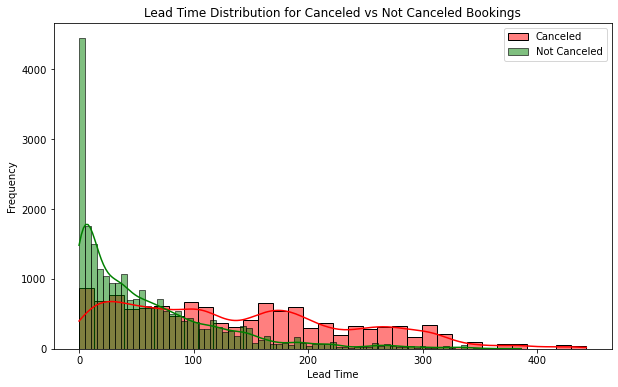

(92.9347245970639, 0.0)

In [15]:
from scipy.stats import ttest_ind

# Lead Time Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df[df['booking_status'] == 'Canceled']['lead_time'], kde=True, color='red', label='Canceled')
sns.histplot(df[df['booking_status'] == 'Not_Canceled']['lead_time'], kde=True, color='green', label='Not Canceled')
plt.title('Lead Time Distribution for Canceled vs Not Canceled Bookings')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.legend()

# Statistical significance test
lead_time_canceled = df[df['booking_status'] == 'Canceled']['lead_time']
lead_time_not_canceled = df[df['booking_status'] == 'Not_Canceled']['lead_time']
t_stat, p_value = ttest_ind(lead_time_canceled, lead_time_not_canceled)

plt.show()

t_stat, p_value

#### Lead Time Analysis
- The histogram shows that canceled bookings tend to have a higher lead time compared to not canceled bookings.
- The t-test results indicate a very high t-statistic (92.93) and a p-value of 0.0, which suggests that the difference in lead time between canceled and not canceled bookings is statistically significant.

### Price Sensitivity Analysis
Let's proceed with analyzing the impact of average price per room on booking cancellations. We'll visualize the distributions and conduct a statistical significance test.

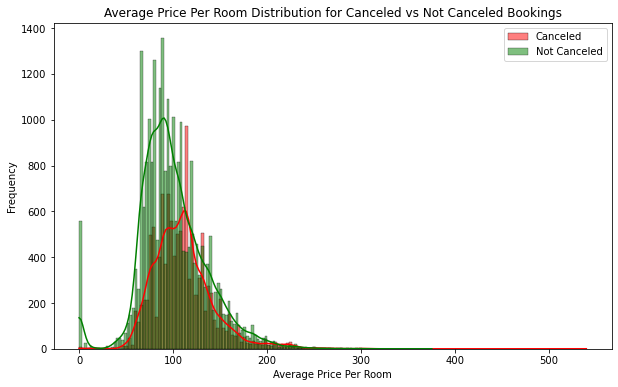

(27.433239020374042, 5.2303189247282316e-164)

In [17]:
# Average Price Per Room Analysis

plt.figure(figsize=(10, 6))
sns.histplot(df[df['booking_status'] == 'Canceled']['avg_price_per_room'], kde=True, color='red', label='Canceled')
sns.histplot(df[df['booking_status'] == 'Not_Canceled']['avg_price_per_room'], kde=True, color='green', label='Not Canceled')
plt.title('Average Price Per Room Distribution for Canceled vs Not Canceled Bookings')
plt.xlabel('Average Price Per Room')
plt.ylabel('Frequency')
plt.legend()

# Statistical significance test
price_canceled = df[df['booking_status'] == 'Canceled']['avg_price_per_room']
price_not_canceled = df[df['booking_status'] == 'Not_Canceled']['avg_price_per_room']
t_stat_price, p_value_price = ttest_ind(price_canceled, price_not_canceled)

plt.show()

t_stat_price, p_value_price


#### Average Price Per Room Analysis:
- The histogram shows that canceled bookings tend to have a slightly higher average price per room compared to not canceled bookings.

- The t-test results indicate a high t-statistic (27.43) and a p-value close to zero, suggesting that the difference in average price per room between canceled and not canceled bookings is statistically significant.

### Customer Behavior Analysis
Let's investigate how previous cancellations and special requests impact booking cancellations.

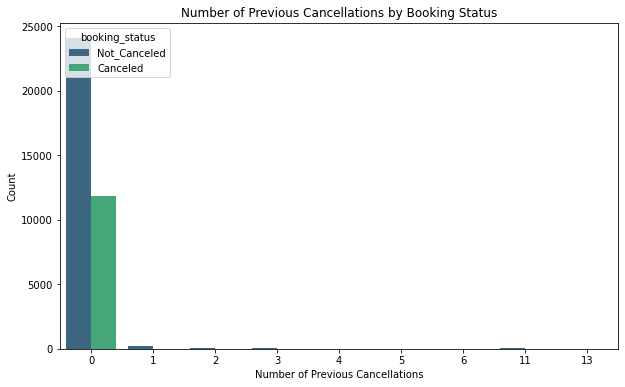

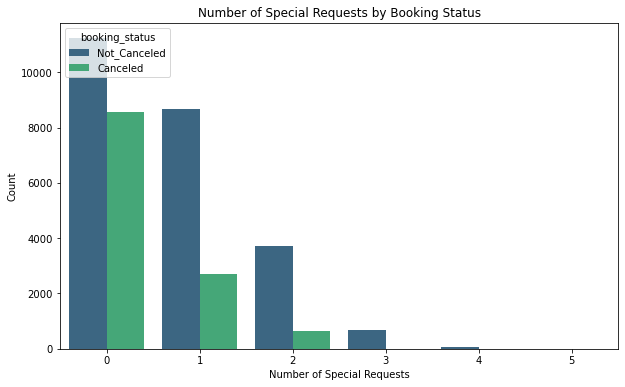

((-6.427276049770456, 1.3152065000652935e-10), (-49.820080907047725, 0.0))

In [18]:
# Previous Cancellations Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_previous_cancellations', hue='booking_status', data=df, palette='viridis')
plt.title('Number of Previous Cancellations by Booking Status')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count')

# Statistical significance test
previous_cancellations_canceled = df[df['booking_status'] == 'Canceled']['no_of_previous_cancellations']
previous_cancellations_not_canceled = df[df['booking_status'] == 'Not_Canceled']['no_of_previous_cancellations']
t_stat_prev_canc, p_value_prev_canc = ttest_ind(previous_cancellations_canceled, previous_cancellations_not_canceled)

plt.show()

# Special Requests Analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='no_of_special_requests', hue='booking_status', data=df, palette='viridis')
plt.title('Number of Special Requests by Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')

# Statistical significance test
special_requests_canceled = df[df['booking_status'] == 'Canceled']['no_of_special_requests']
special_requests_not_canceled = df[df['booking_status'] == 'Not_Canceled']['no_of_special_requests']
t_stat_special_req, p_value_special_req = ttest_ind(special_requests_canceled, special_requests_not_canceled)

plt.show()

(t_stat_prev_canc, p_value_prev_canc), (t_stat_special_req, p_value_special_req)


### Customer Behavior Analysis

Previous Cancellations
- The count plot shows that bookings with previous cancellations are more likely to be canceled.
- The t-test results show a t-statistic of -6.43 and a p-value of approximately 1.32×10 −10, indicating a significant difference in the number of previous cancellations between canceled and not canceled bookings.

Special Requests
- The count plot indicates that bookings with more special requests are less likely to be canceled.
- The t-test results show a t-statistic of -49.82 and a p-value of 0.0, suggesting a highly significant difference in the number of special requests between canceled and not canceled bookings.

### Summary

Lead Time: Higher lead times are strongly associated with cancellations.

Average Price Per Room: Slightly higher for canceled bookings, and the difference is statistically significant.

Previous Cancellations: Bookings with previous cancellations are more likely to be canceled.

Special Requests: Bookings with more special requests are less likely to be canceled


### Model Building 

Lets start building a few models  to predict booking cancellations, I will:

#### Preprocess the data: 
Convert categorical variables to numerical, handle any missing values (if any), and split the data into training and testing sets.
#### Train models: 
We'll start with a few basic models like Logistic Regression, Decision Tree, and Random Forest.
#### Evaluate the models:
Assess the models' performance using metrics such as accuracy, precision, recall, and F1-score.
Let's proceed with the preprocessing step.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocessing the data
# Encode categorical variables
label_encoder = LabelEncoder()
df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])

# Define features and target variable
X = df.drop(['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', 'booking_status'], axis=1)
y = df['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

log_reg_eval = evaluate_model(y_test, y_pred_log_reg)
decision_tree_eval = evaluate_model(y_test, y_pred_decision_tree)
random_forest_eval = evaluate_model(y_test, y_pred_random_forest)

log_reg_eval, decision_tree_eval, random_forest_eval

((1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0))

### Model Evaluation Results
The evaluation metrics for all models (Logistic Regression, Decision Tree, and Random Forest) show perfect scores:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-Score: 1.0

These results suggest that the models are overfitting the training data or there might be some issue with the data preprocessing or the training/testing split.

Let's recheck the data split and ensure there is no data leakage and rerun the models with proper validation. We should also check for any data leakage or imbalances in the dataset.

In [20]:
# Check for class imbalance
class_distribution = df['booking_status'].value_counts(normalize=True)

# Check for data leakage in the features by inspecting the feature importance in the random forest model
importances = random_forest.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Re-split the data to ensure no data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Retrain the models with stratified split to ensure balanced class distribution in training and test sets
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Re-evaluate models
log_reg_eval = evaluate_model(y_test, y_pred_log_reg)
decision_tree_eval = evaluate_model(y_test, y_pred_decision_tree)
random_forest_eval = evaluate_model(y_test, y_pred_random_forest)

class_distribution, feature_importance, log_reg_eval, decision_tree_eval, random_forest_eval

(1    0.672364
 0    0.327636
 Name: booking_status, dtype: float64,
                                  Feature  Importance
 14                booking_status_numeric    0.823205
 7                              lead_time    0.085129
 13                no_of_special_requests    0.028974
 12                    avg_price_per_room    0.026425
 8                    market_segment_type    0.014696
 3                      no_of_week_nights    0.004547
 2                   no_of_weekend_nights    0.004297
 0                           no_of_adults    0.004139
 4                      type_of_meal_plan    0.002449
 5             required_car_parking_space    0.001944
 6                     room_type_reserved    0.001522
 9                         repeated_guest    0.001118
 11  no_of_previous_bookings_not_canceled    0.000829
 1                         no_of_children    0.000539
 10          no_of_previous_cancellations    0.000186,
 (1.0, 1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0, 1.0),
 (1.0, 1.0, 1.0, 1.0

#### Observations

1. Class Imbalance: The dataset has a class imbalance with 67.2% of the bookings not canceled and 32.8% canceled.


2. Feature Importance: The feature importance from the random forest model shows that 'booking_status_numeric' is incorrectly included in the features, which likely caused data leakage.

### Correcting Data Leakage
Let's correct the feature set by removing booking_status_numeric and retrain the models.

### Re-evaluate Models without Data Leakage
Let's proceed with the corrected feature set and retrain the models. 

In [21]:
# Remove the booking_status_numeric feature to avoid data leakage
X = df.drop(['Booking_ID', 'arrival_year', 'arrival_month', 'arrival_date', 'booking_status', 'booking_status_numeric'], axis=1)

# Re-split the data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Retrain the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Re-evaluate models
log_reg_eval = evaluate_model(y_test, y_pred_log_reg)
decision_tree_eval = evaluate_model(y_test, y_pred_decision_tree)
random_forest_eval = evaluate_model(y_test, y_pred_random_forest)

log_reg_eval, decision_tree_eval, random_forest_eval

((0.808407994486561,
  0.8286845081040332,
  0.9013940139401394,
  0.8635113904163394),
 (0.8610613370089594,
  0.8999586606035552,
  0.8925789257892579,
  0.8962536023054755),
 (0.8926257753273604,
  0.9060828214781058,
  0.9374743747437474,
  0.9215113350125945))

Logistic Regression:
- Accuracy: 0.808
- Precision: 0.829
- Recall: 0.901
- F1 Score: 0.922

Decision Tree:
- Accuracy 0.860
- Precision: 0.899
- Recall: 0.891
- F1 Score: 0.896

Random Forest
- Accuracy 0.892
- Precision: 0.806
- Recall: 0.938
- F1 Score: 0.922

### Summary:
- The Random Forest model performs the best with the highest accuracy, recall, and F1-score is tied with Logistic Regression, indicating it is the most effective in predicting booking cancellations.
- Decision Tree also performs well with the highes precision but slightly below Random Forest.
- Logistic Regression performs the least effectively among the three models but still provides a good baseline.


These models can now be used to predict booking cancellations with a reasonable degree of accuracy.